In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle        #用于打乱表格，使用于split函数之前
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/c

/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/c

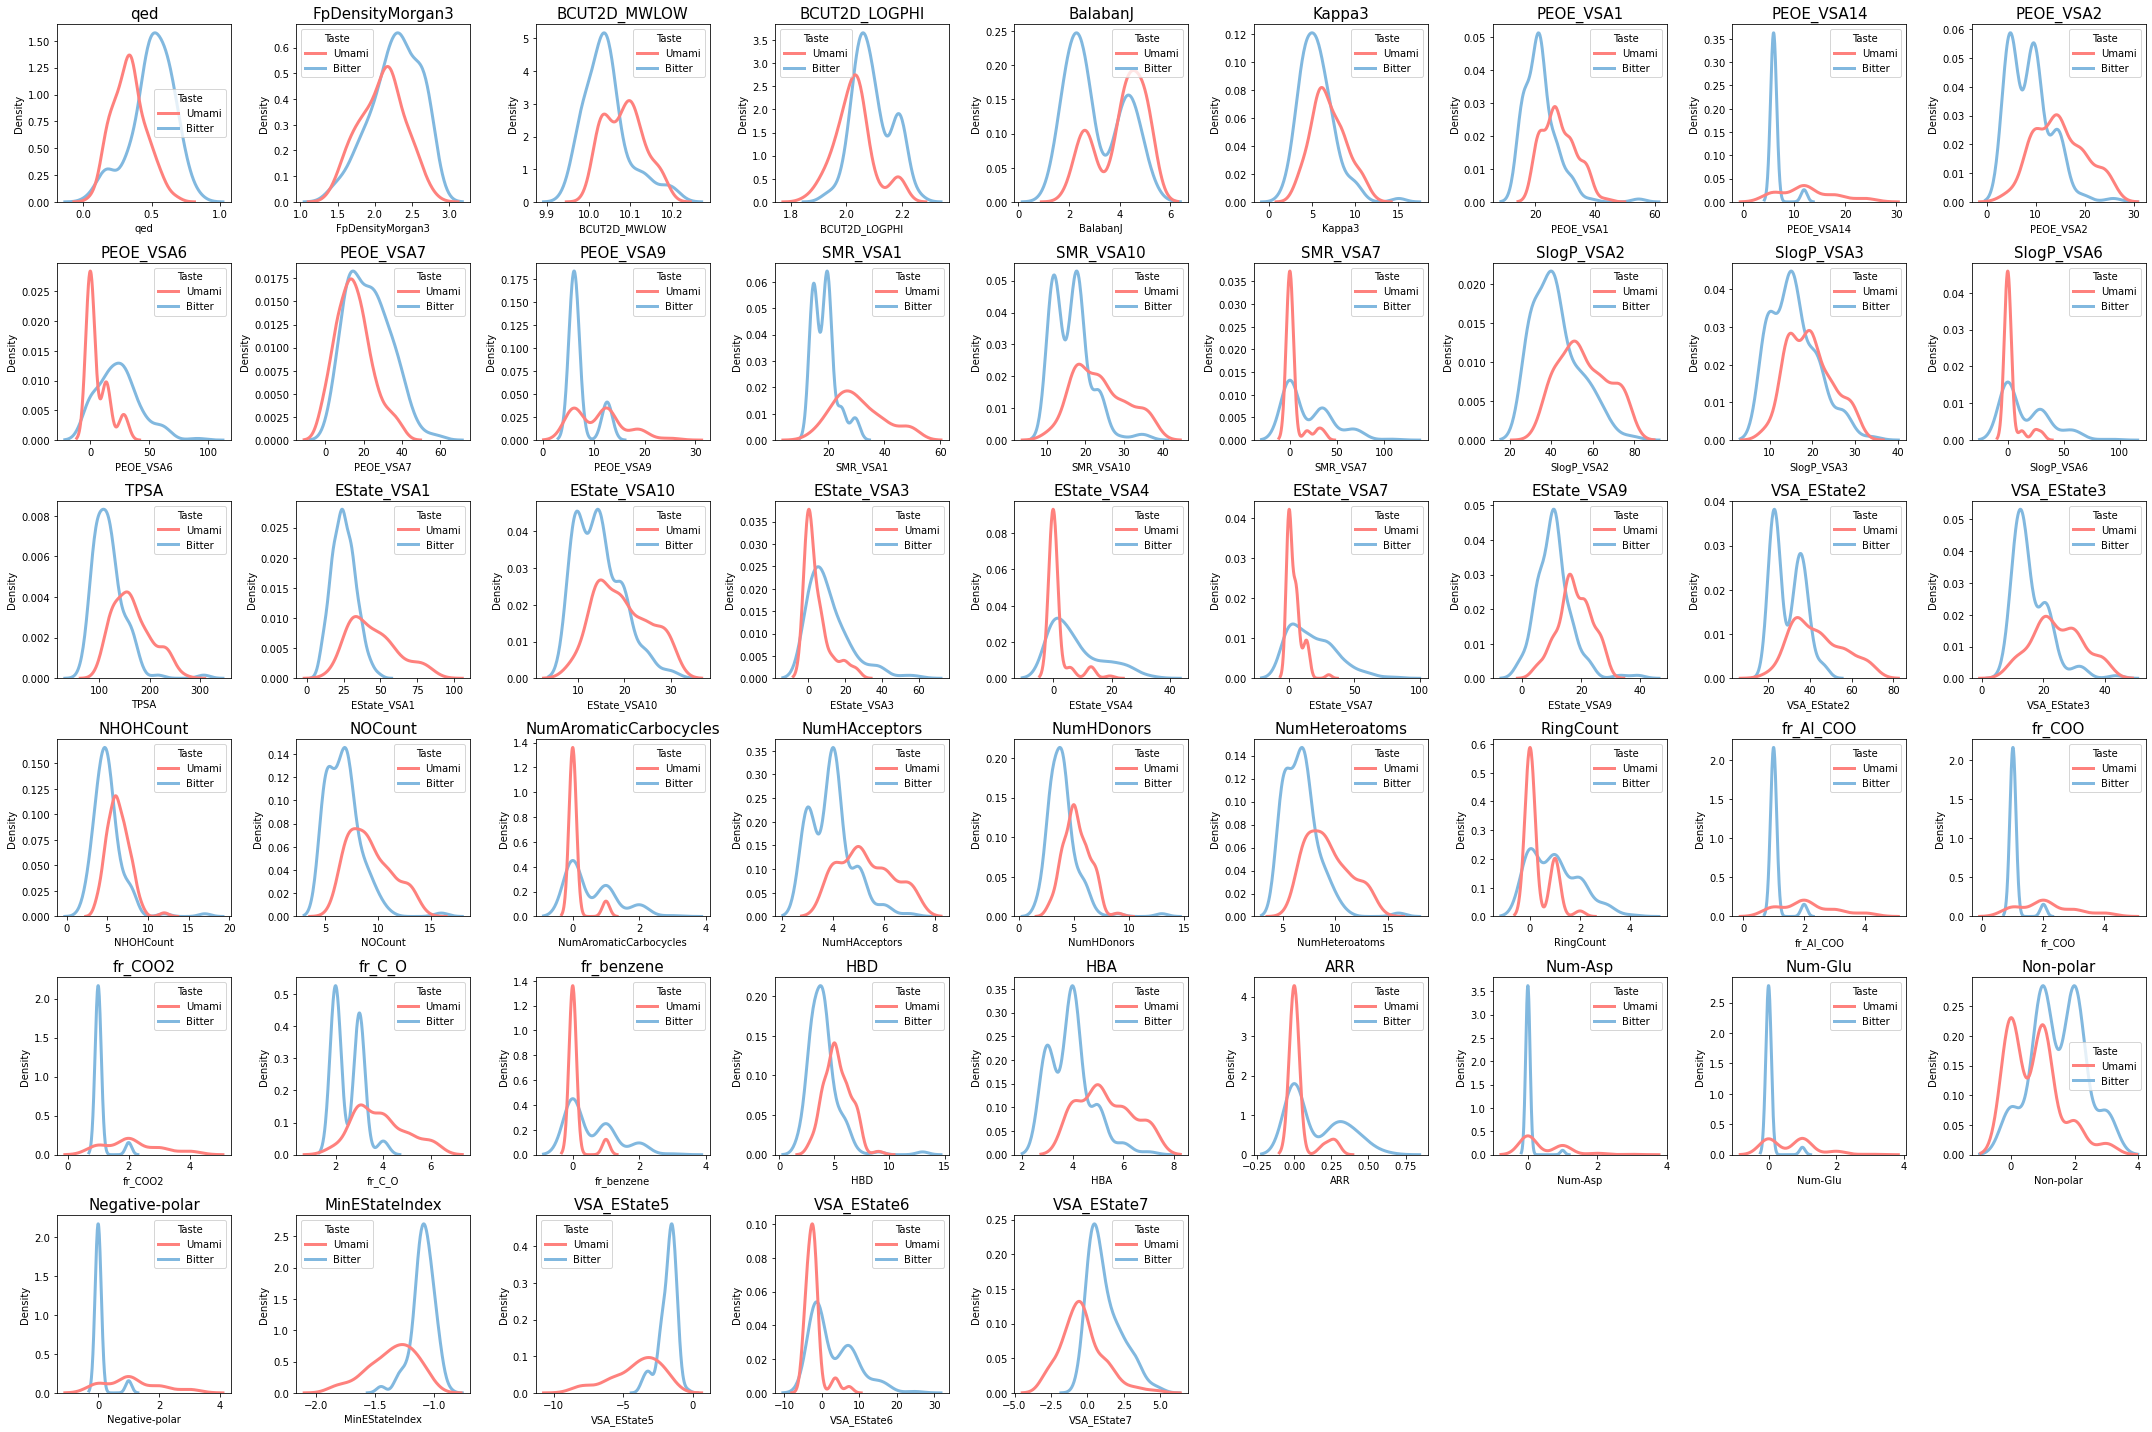

In [5]:
df_merge = pd.read_csv("Fig_data/KS-T筛选后的数据.csv")
import seaborn as sns
import matplotlib.pyplot as plt
pal2 = sns.color_palette(['#FE817D', '#81B8DF'])
sns.set_palette(pal2)
columns = df_merge.iloc[:,2:-1].columns
fig = plt.figure(figsize=(30,20))
for ii, name in enumerate(columns):
    plt.subplot(6,9 , ii + 1)
    sns.kdeplot(data=df_merge, x=name, hue="Taste", lw=3, bw=0.4)
    plt.title(name, fontsize=15)

plt.tight_layout()
# plt.savefig("Paper_Fig\\EDA\\全分布图—筛选后.svg",bbox_inches="tight")
plt.show()

In [7]:
def estimator_fig(X,Y,cv,random_state):
    """
    
    
    """
    # Create the RFE object and compute a cross-validated score.
    forest = RandomForestClassifier(random_state=random_state,oob_score=True,n_jobs=-1) 
    # The "accuracy" scoring is proportional to the number of correct
    # classifications

    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(estimator=forest, step=1, cv=StratifiedKFold(cv),           # 分层交叉验证
                  scoring='roc_auc',n_jobs=-1,
                  min_features_to_select=min_features_to_select)
    rfecv.fit(X, Y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(min_features_to_select,len(rfecv.grid_scores_) + min_features_to_select),
             rfecv.grid_scores_,color="#2a557f")
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     plt.savefig("Paper_Fig\\EDA\\特征筛选.svg",bbox_inches="tight")
    plt.show()
    score = rfecv.grid_scores_
    feature_choose = X.columns[rfecv.get_support() == True]     #这个会返回支持的True和False名单 rfecv.support_
    return score,   feature_choose   ,rfecv.ranking_         # 再返回一下选择得到的特征把  #为什

Optimal number of features : 8


/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


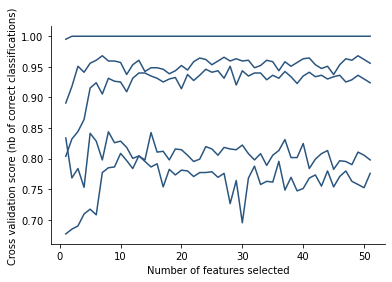

/home/cui_wsl2/anaconda3/envs/tasteppetidesdm_p3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [8]:
score,   feature_choose   ,ranking_ = estimator_fig(df_merge.iloc[:,2:],df_merge["Taste"],5,654)